In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import folium
from folium import plugins
import geopandas as gpd
import branca

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import ttest_ind

plt.rcParams["font.family"] = "monospace"
plt.rcParams['figure.dpi'] = 150
background_color='#F5F4EF'

# Print colored text 
# https://stackoverflow.com/questions/287871/how-to-print-colored-text-to-the-terminal
# Includes other color options

HEADER = '\033[95m'
OKBLUE = '\033[94m'
OKCYAN = '\033[96m'
OKGREEN = '\033[92m'
WARNING = '\033[93m'
FAIL = '\033[91m'
ENDC = '\033[0m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'

class color_font:
    S = BOLD + OKBLUE +  UNDERLINE   #S = Start
    E = ENDC #E = End
    
print(color_font.S+"Datasets & Libraries loaded"+color_font.E)

/kaggle/input/olympic-games-2021-medals/Tokyo 2021 dataset v4.csv
/kaggle/input/olympic-games-2021-medals/Tokyo 2021 dataset v3.csv
/kaggle/input/population-by-country-2020/population_by_country_2020.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Datasets & Libraries loaded


In [2]:
population = pd.read_csv('/kaggle/input/population-by-country-2020/population_by_country_2020.csv')
regions = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')

df = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
df_21 = pd.read_csv('/kaggle/input/olympic-games-2021-medals/Tokyo 2021 dataset v3.csv')
df_21_full = pd.read_csv('/kaggle/input/olympic-games-2021-medals/Tokyo 2021 dataset v4.csv')


# For geographic plotting
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

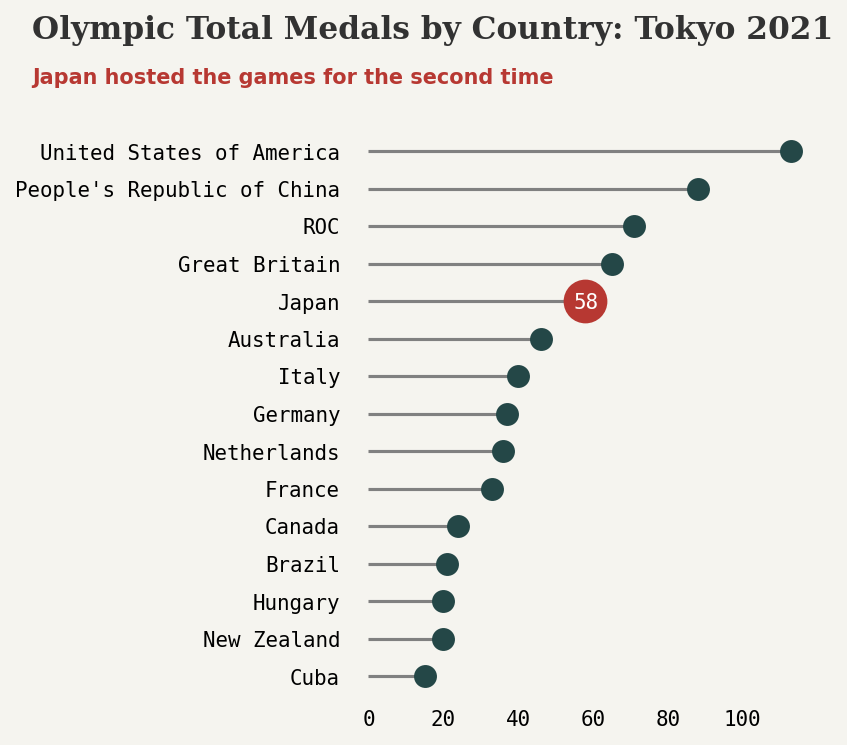

In [3]:
fig, ax = plt.subplots(figsize=(4, 5), facecolor=background_color)

temp = df_21_full[:15].sort_values(by='Total')
my_range=range(1,len(df_21_full[:15]['Team/NOC'])+1)


ax.set_facecolor(background_color)

#B73832



plt.hlines(y=my_range, xmin=0, xmax=temp['Total'], color='gray')
plt.plot(temp['Total'], my_range, "o",markersize=10, color='#244747')
plt.plot(temp['Total'][2], my_range[10], "o",markersize=20,color='#B73832')


Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Total Medals",fontfamily='monospace',loc='left',color='gray')
ax.set_axisbelow(True)


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    


ax.text(-90,Yend+2.3, 'Olympic Total Medals by Country: Tokyo 2021', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(-90,Yend+1.1, 'Japan hosted the games for the second time', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')
#ax.text(-100,Yend+1, 'Not Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#244747')



# Add titles and axis names
plt.yticks(my_range, temp['Team/NOC'])
plt.xlabel('')


ax.annotate(temp['Total'][2], xy=(54.86,10.95), va = 'center', ha='left',fontweight='light', fontfamily='monospace',fontsize=10, color='white',rotation=0)

# Show the plot
plt.show()

In [4]:
def highlight(nation):
    if nation['Team/NOC'] == 'Japan':
        return ['background-color: #f3f2f1']*6
    else:
        return ['background-color: white']*6

df_21_full[['Rank','Team/NOC','Bronze Medal','Silver Medal','Gold Medal','Total']].iloc[:15].style.set_caption('Medals by Country: Summer Olympic Games sorted by Gold Medals [Top 15]')\
.bar(subset=['Gold Medal'], color='#f0c05a')\
.bar(subset=['Silver Medal'], color='Lightgray')\
.bar(subset=['Bronze Medal'], color='#a97142')\
.hide_index().apply(highlight, axis=1)

Rank,Team/NOC,Bronze Medal,Silver Medal,Gold Medal,Total
1,United States of America,33,41,39,113
2,People's Republic of China,18,32,38,88
3,Japan,17,14,27,58
4,Great Britain,22,21,22,65
5,ROC,23,28,20,71
6,Australia,22,7,17,46
7,Netherlands,14,12,10,36
8,France,11,12,10,33
9,Germany,16,11,10,37
10,Italy,20,10,10,40


In [5]:
# For geographic plotting
global_polygons = gpd.read_file(country_shapes)
global_polygons.to_file('global_polygons.geojson', driver = 'GeoJSON')

#global_polygons.plot(figsize=(10,5)) we now have a map of the globe

# Tabular
df = pd.merge(df,regions,left_on='NOC',right_on='NOC')
df = df.query('Season == "Summer"') # Only interested in Summer Olympics for this project

In [6]:
#Replacing the country name with common values
df.replace('USA', "United States of America", inplace = True)
df.replace('Tanzania', "United Republic of Tanzania", inplace = True)
df.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
df.replace('Congo', "Republic of the Congo", inplace = True)
df.replace('Lao', "Laos", inplace = True)
df.replace('Syrian Arab Republic', "Syria", inplace = True)
df.replace('Serbia', "Republic of Serbia", inplace = True)
df.replace('Czechia', "Czech Republic", inplace = True)
df.replace('UAE', "United Arab Emirates", inplace = True)
df.replace('UK', "United Kingdom", inplace = True)

population.replace('United States', "United States of America", inplace = True)
population.replace('Czech Republic (Czechia)', "Czech Republic", inplace = True)
population.replace('DR Congo', "Democratic Republic of the Congo", inplace = True)
population.replace('Serbia', "Republic of Serbia", inplace = True)
population.replace('Tanzania', "United Republic of Tanzania", inplace = True)

df_21_full.replace('Great Britain', "United Kingdom", inplace = True)
df_21_full.replace("People's Republic of China", "China", inplace = True)
df_21_full.replace("ROC", "Russia", inplace = True)

In [7]:
# Function to map country to city

def host_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London":
        return "United Kingdom"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis":
        return  "United States of America"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "South Korea"
    elif col == "Moskva":
        return  "Russia"
    elif col == "Montreal":
        return  "Canada"
    elif col == "Munich" or col == "Berlin":
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo":
        return  "Japan"
    elif col == "Roma":
        return  "Italy"
    elif col == "Paris":
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    else:
        return "Other"


# Applying this function

df['Host_Country'] = df['City'].apply(host_country)

In [8]:
df_new = df.groupby(['Year','Host_Country','region','Medal'])['Medal'].count().unstack().fillna(0).astype(int).reset_index()

df_new['Is_Host'] = np.where(df_new['Host_Country'] == df_new['region'],1,0)
df_new['Total Medals'] = df_new['Bronze'] + df_new['Silver'] + df_new['Gold']

In [9]:
# Preparing to add 2021 data to our historic df

df_21_full_refined = df_21_full[['Team/NOC', "Gold Medal", "Silver Medal", "Bronze Medal"]]
df_21_full_refined['Total Medals'] = df_21_full_refined[["Gold Medal", "Silver Medal", "Bronze Medal"]].sum(axis=1)
df_21_full_refined['Year'] = 2021

df_21_full_refined = df_21_full_refined.rename(columns={'Gold Medal':'Gold', 'Silver Medal':'Silver','Bronze Medal':'Bronze'})

df_21_full_refined['Is_Host'] = np.where(df_21_full_refined['Team/NOC'] == 'Japan',1,0)
df_21_full_refined['Host_Country'] = 'Japan'
df_21_full_refined = df_21_full_refined.rename(columns={'Team/NOC':'region'})

# Adding 2021 data to historic
df_new = df_new.append(df_21_full_refined)

# Removing Russia as many Olympic games were competed in as the Soviet Union, containing several modern day nations

df_new = df_new.query("region != 'Russia' | region != 'ROC'")

In [10]:
medals = df.groupby(['region','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

medals['Total'] = medals['Bronze'] + medals['Silver'] + medals['Gold']

medals = medals[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)

medals.iloc[:15].style.set_caption('Medals by Country: Summer Olympic Games [Top 15]')\
.bar(subset=['Gold'], color='#f0c05a')\
.bar(subset=['Silver'], color='Lightgray')\
.bar(subset=['Bronze'], color='#a97142')\
#.background_gradient(subset=['Total'], cmap='BuGn')

Medal,Bronze,Silver,Gold,Total
region,,,,
United States of America,1197,1333,2472,5002
Russia,994,974,1220,3188
Germany,1064,987,1075,3126
United Kingdom,620,729,636,1985
France,587,575,465,1627
Italy,454,474,518,1446
Australia,515,456,362,1333
Hungary,363,328,432,1123
Sweden,358,396,354,1108


In [11]:
host_list = list(df_new.query("Is_Host == 1")['Host_Country'].value_counts().index)

medals_temp = medals.reset_index()
medals_map = pd.merge(global_polygons, medals_temp, left_on='name',right_on='region')
medals_map['Hosted'] = np.where(medals_map['name'].isin(host_list),1,0)

In [12]:
def rd2(x):
    return round(x, 2)

Temp = medals_map

minimum, maximum = Temp["Total"].quantile([0.05, 0.95]).apply(rd2)
mean = round(Temp["Total"].mean(), 2)


colormap = branca.colormap.LinearColormap(
    colors=["#f2f0f7", "#cbc9e2", "#9e9ac8", "#756bb1", "#54278f"],
    index=Temp["Total"].quantile([0.25, 0.5, 0.85, 0.95]),
    vmin=minimum,
    vmax=maximum,
)

colormap.caption = "Total medals"

from folium.plugins import Search
from folium.plugins import HeatMap


m = folium.Map(location=(50,0),zoom_start=3)


def style_function(x):
    return {
        "fillColor": colormap(x["properties"]["Total"]),
        "color": "black",
        "weight": 2,
        "fillOpacity": 0.5,
    }


Map_Layer = folium.GeoJson(
    Temp,
    name="Medals",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=["name","Total","Gold","Silver","Bronze"], aliases=["Country","Total Medals","Gold","Silver","Bronze"], localize=True
    ),
).add_to(m)


plugins.Search(Map_Layer,position='topleft',
                           search_zoom=5,placeholder="Search for a country",weight=3,
                           search_label='region',
                           geom_type='Polygon').add_to(m)


minimap = plugins.MiniMap()
m.add_child(minimap)
    
folium.LayerControl().add_to(m)
colormap.add_to(m)

m

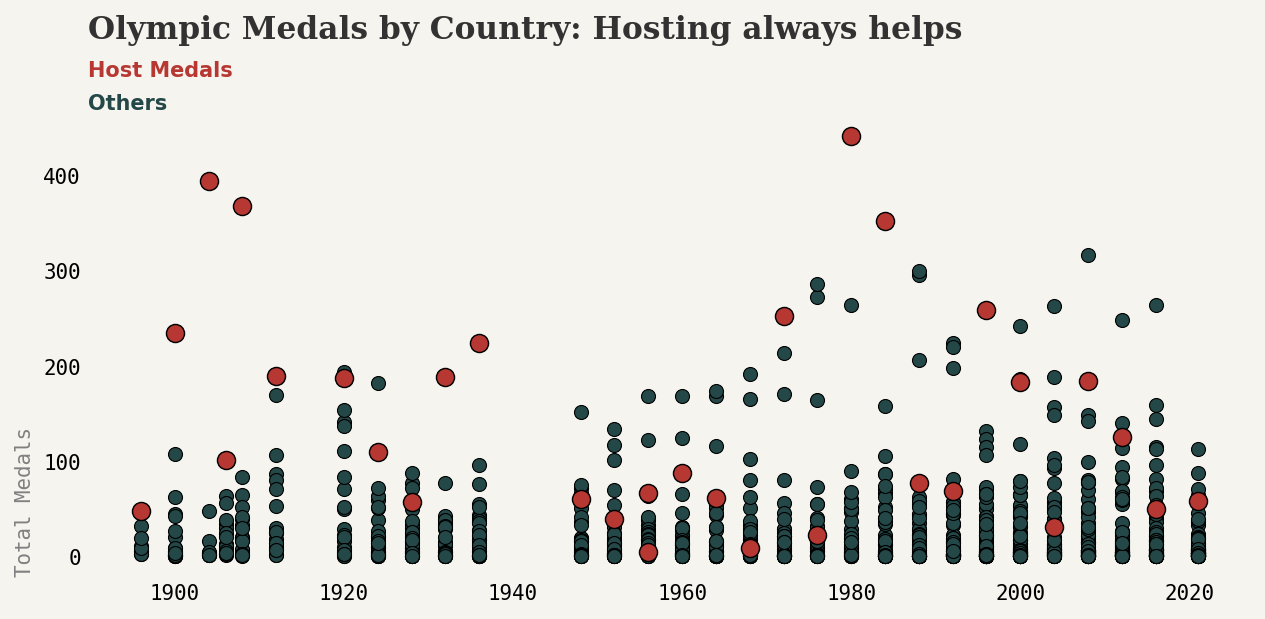

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10,4), facecolor=background_color)

sns.scatterplot(data=df_new.query("Is_Host == 0"), x='Year', y='Total Medals', s=45, ec='black', color='#244747',ax=ax)
sns.scatterplot(data=df_new.query("Is_Host == 1"), x='Year', y='Total Medals', s=75, ec='black', color='#B73832',ax=ax)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("Total Medals",fontfamily='monospace',loc='bottom',color='gray')
ax.set_xlabel("")

ax.set_facecolor(background_color)
ax.set_axisbelow(True)


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    

ax.text(Xstart,Yend+80, 'Olympic Medals by Country: Hosting always helps', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend+40, 'Host Medals', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(Xstart,Yend+5, 'Others', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#244747')

plt.show()

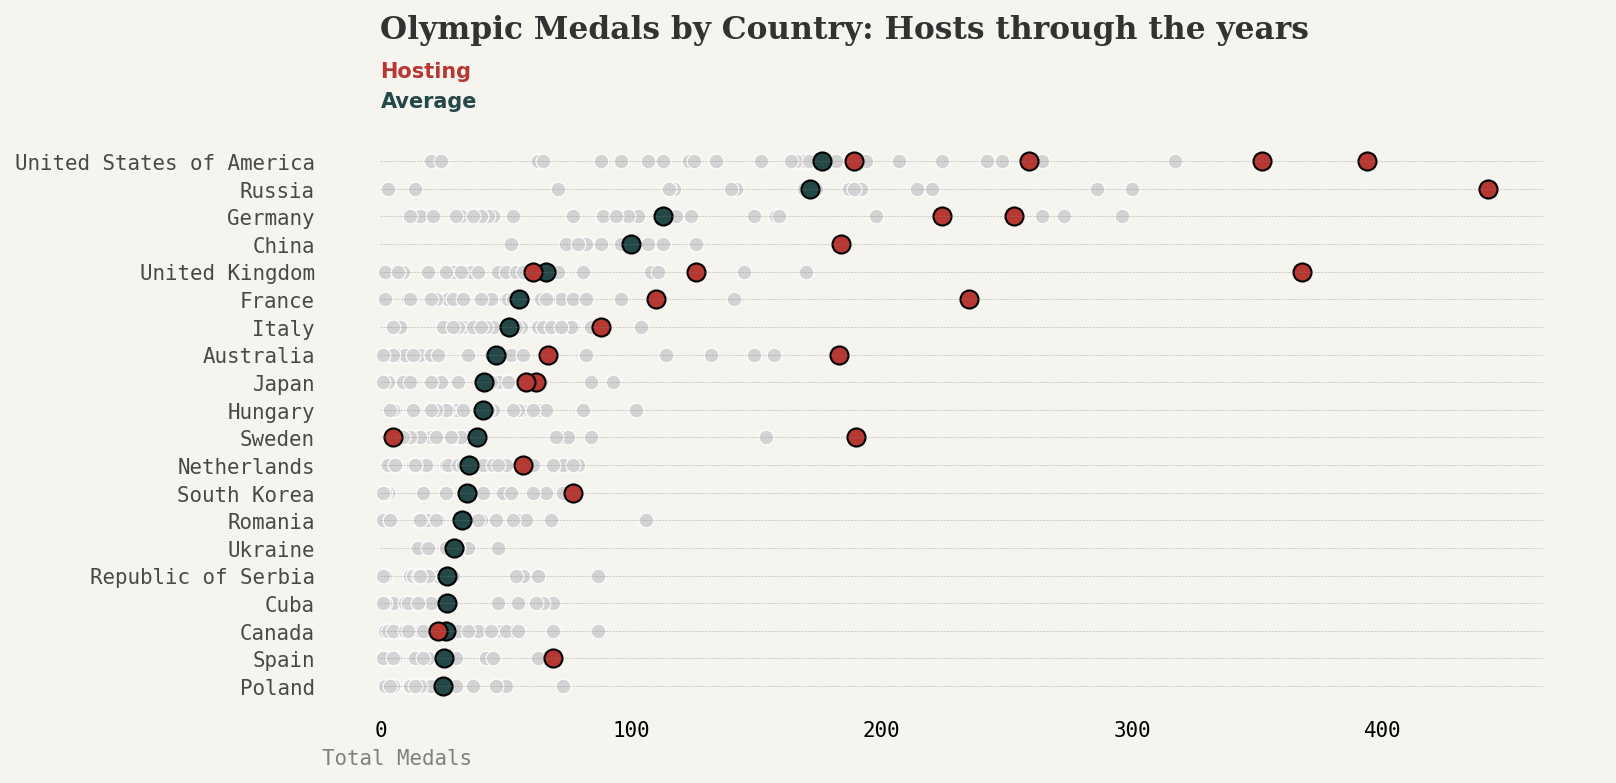

In [14]:
fig, ax = plt.subplots(1,1, figsize=(11, 5), facecolor=background_color)

# top 20
top_list_ = df_new.groupby('region')['Total Medals'].mean().sort_values(ascending=False).reset_index()[:20].sort_values(by='Total Medals',ascending=True)

plot = 1
for country in top_list_['region']:
    mean = df_new[df_new['region'] == country].groupby('region')['Total Medals'].mean()
    # historic scores
    sns.scatterplot(data=df_new[df_new['region'] == country], y=plot, x='Total Medals',color='lightgray',s=50,ax=ax)
    # mean score
    sns.scatterplot(data=df_new[df_new['region'] == country], y=plot, x=mean,color='#244747',ec='black',linewidth=1,s=75,ax=ax)
    # Hosting score
    sns.scatterplot(data=(df_new[(df_new['region'] == country) & (df_new['Is_Host'] == 1)]), y=plot, x='Total Medals',color='#B73832',ec='black',linewidth=1,s=75,ax=ax)   
    plot += 1

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['region'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Total Medals",fontfamily='monospace',loc='left',color='gray')
ax.set_facecolor(background_color)
ax.hlines(y=top_list_.index+1, xmin=0, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    


ax.text(0,Yend+3.5, 'Olympic Medals by Country: Hosts through the years', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(0,Yend+2.1, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(0,Yend+1, 'Average', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#244747')


plt.show()

In [15]:
Temp = medals_map

colormap = branca.colormap.LinearColormap(
    colors=["#f2f0f7",  "#B73832"],
    index=Temp["Hosted"].quantile([0.05, 0.5]),
    vmin=0,
    vmax=1,
)

colormap.caption = "Hosted"

from folium.plugins import Search
from folium.plugins import HeatMap


m = folium.Map(location=(50,0),zoom_start=3)


def style_function(x):
    return {
        "fillColor": colormap(x["properties"]["Hosted"]),
        "color": "black",
        "weight": 2,
        "fillOpacity": 0.5,
    }


Map_Layer = folium.GeoJson(
    Temp,
    name="Hosted",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=["name","Total","Gold","Silver","Bronze"], aliases=["Country","Total Medals","Gold","Silver","Bronze"], localize=True
    ),
).add_to(m)


plugins.Search(Map_Layer,position='topleft',
                           search_zoom=5,placeholder="Search for a country",weight=3,
                           search_label='region',
                           geom_type='Polygon').add_to(m)


minimap = plugins.MiniMap()
m.add_child(minimap)
    
folium.LayerControl().add_to(m)
colormap.add_to(m)

m

In [16]:
sample = df_new.groupby(['region','Is_Host'])['Gold'].mean().unstack().dropna()
sample = sample.rename(columns={0 : "Not Hosting", 1 : "Hosting"})
sample = sample.reset_index().query("region == 'Japan' | region == 'Brazil' | region == 'United Kingdom' | region == 'China' | region == 'Greece' ").set_index('region')

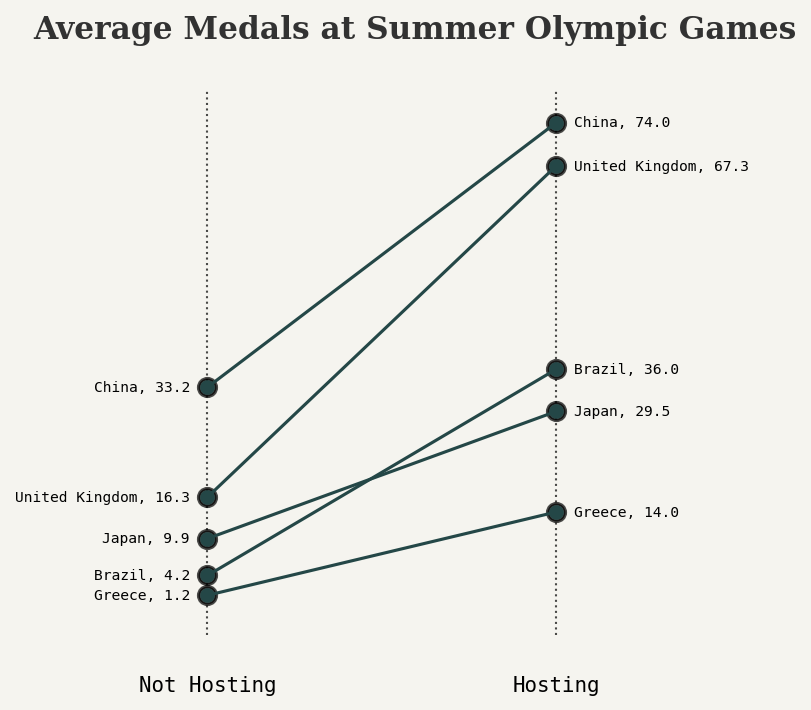

In [17]:
import matplotlib.lines as mlines

low_c = '#B73832'
high_c = '#244747'

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(sample.index, sample['Not Hosting'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(sample.index, sample['Hosting'])]
klass = [low_c if (y1-y2) < 0 else high_c for y1, y2 in zip(sample['Not Hosting'], sample['Hosting'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=low_c if p1[1]-p2[1] > 0 else high_c, marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(6,5), dpi= 150, facecolor=background_color)

ax.set_facecolor(background_color)
ax.vlines(x=1, ymin=-5, ymax=100, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=-5, ymax=100, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=sample['Not Hosting'], x=np.repeat(1, sample.shape[0]), s=75,linewidth=1.5, color='black', alpha=0.7)
ax.scatter(y=sample['Hosting'], x=np.repeat(3, sample.shape[0]), s=75, linewidth=1.5,color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(sample['Not Hosting'], sample['Hosting'], sample.index):
    newline([1,p1], [3,p2])
    ax.text(1-0.1, p1, c + ', ' + str(round(p1,1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':7})
    ax.text(3+0.1, p2, c + ', ' + str(round(p2,1)), horizontalalignment='left', verticalalignment='center', fontdict={'size':7})


ax.text(0,87,"Average Medals at Summer Olympic Games", fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')

ax.set(xlim=(0,4), ylim=(-10,sample.max().max()+5), ylabel='') #ylim=(), 
ax.set_xticks([1,3])
ax.set_xticklabels(["Not Hosting", "Hosting"],fontsize=10)
#ax.xaxis.tick_top()

for s in ["top","right","left","bottom"]:
    ax.spines[s].set_visible(False)
    
ax.tick_params(axis='both',which='both',length=0,labelleft=False) 
plt.rcParams["font.family"] = "monospace"

plt.show()

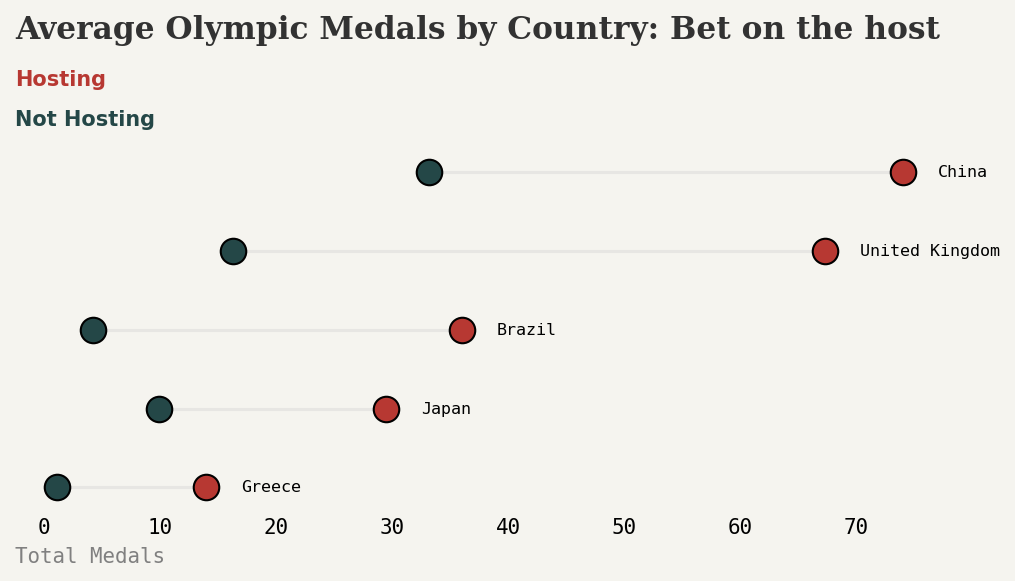

In [18]:
fig, ax = plt.subplots(1,1, figsize=(8,3), facecolor=background_color)

value1= sample['Not Hosting']
value2=sample['Hosting']


ordered_df = sample.sort_values(by='Hosting', ascending=True)
my_range=range(1,len(ordered_df.index)+1)
 

plt.hlines(y=my_range, xmin=ordered_df['Not Hosting'], xmax=ordered_df['Hosting'], color='lightgray', alpha=0.4,zorder=1)
plt.scatter(ordered_df['Not Hosting'], my_range, color='#244747', alpha=1, ec='black',label='Not Hosting',s=150)
plt.scatter(ordered_df['Hosting'], my_range, color='#B73832', alpha=1 , ec='black', label='Hosting',s=150)


for i in range(0,5):
    ax.annotate(ordered_df.index[i], 
                   xy=((ordered_df[["Not Hosting", "Hosting"]].max(axis=1)[i]+3),i+1), 
                   va = 'center', ha='left',fontweight='light', fontfamily='monospace',fontsize=8, color='black',rotation=0)


ax.axes.get_yaxis().set_ticks([])


for s in ['top','left', 'bottom', 'right']:
    ax.spines[s].set_visible(False)
    
ax.set_facecolor(background_color)    
ax.set_xlabel("Total Medals",fontfamily='monospace',loc='left',color='gray')
ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 
ax.set_yticklabels([])
    
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()


ax.text(Xstart,Yend+1.5, 'Average Olympic Medals by Country: Bet on the host', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend+0.9, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(Xstart,Yend+0.4, 'Not Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#244747')


plt.show()

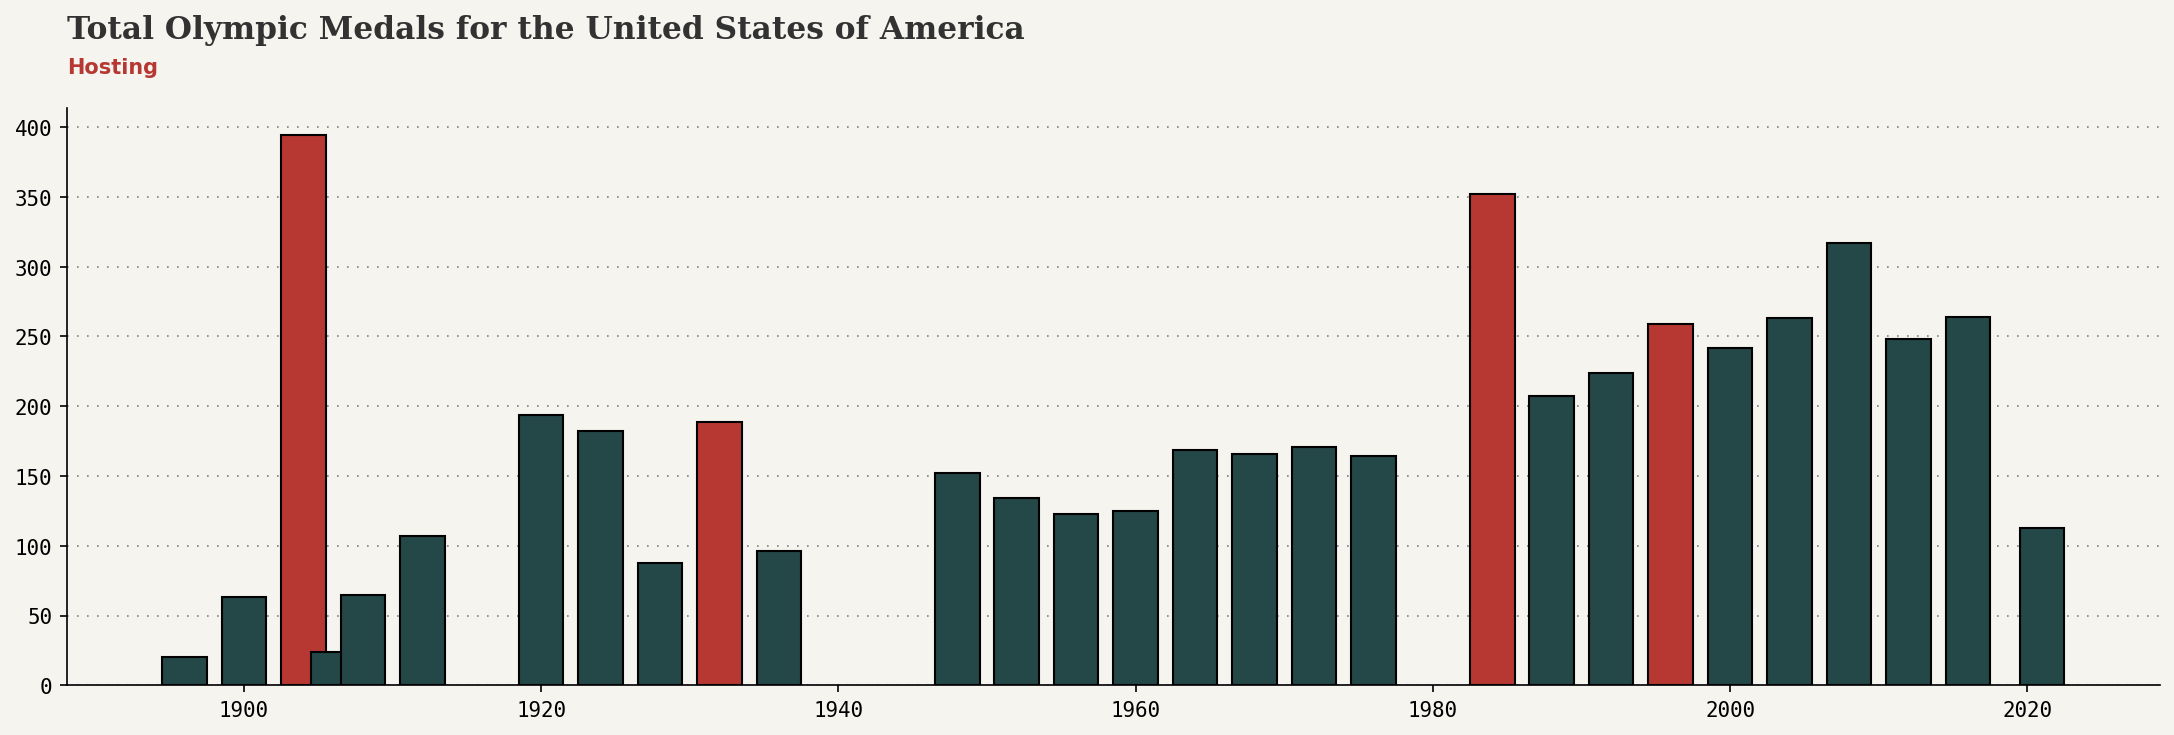

In [19]:
temp = df_new.query("region == 'United States of America'")


fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor=background_color)

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor(background_color)
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+50, 'Total Olympic Medals for the United States of America', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend+25, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')

plt.show()

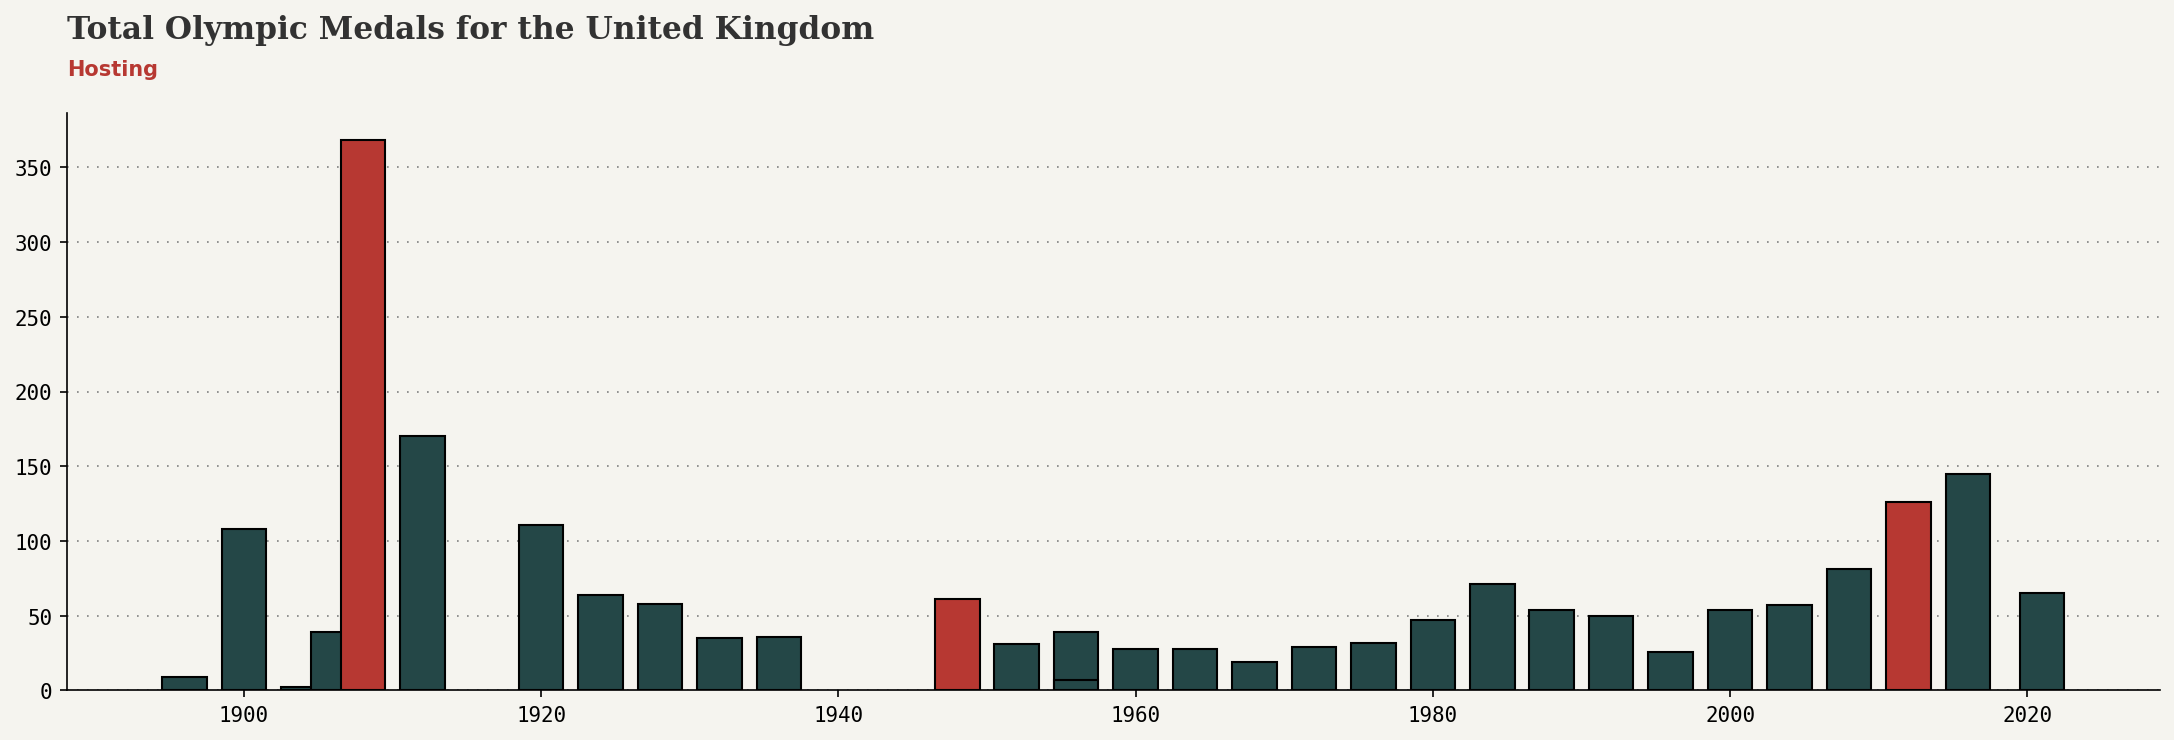

In [20]:
temp = df_new.query("region == 'United Kingdom'")


fig, ax = plt.subplots(1, 1, figsize=(18, 5), dpi=150, facecolor=background_color)

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor(background_color)
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+50, 'Total Olympic Medals for the United Kingdom', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend+25, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')

plt.show()

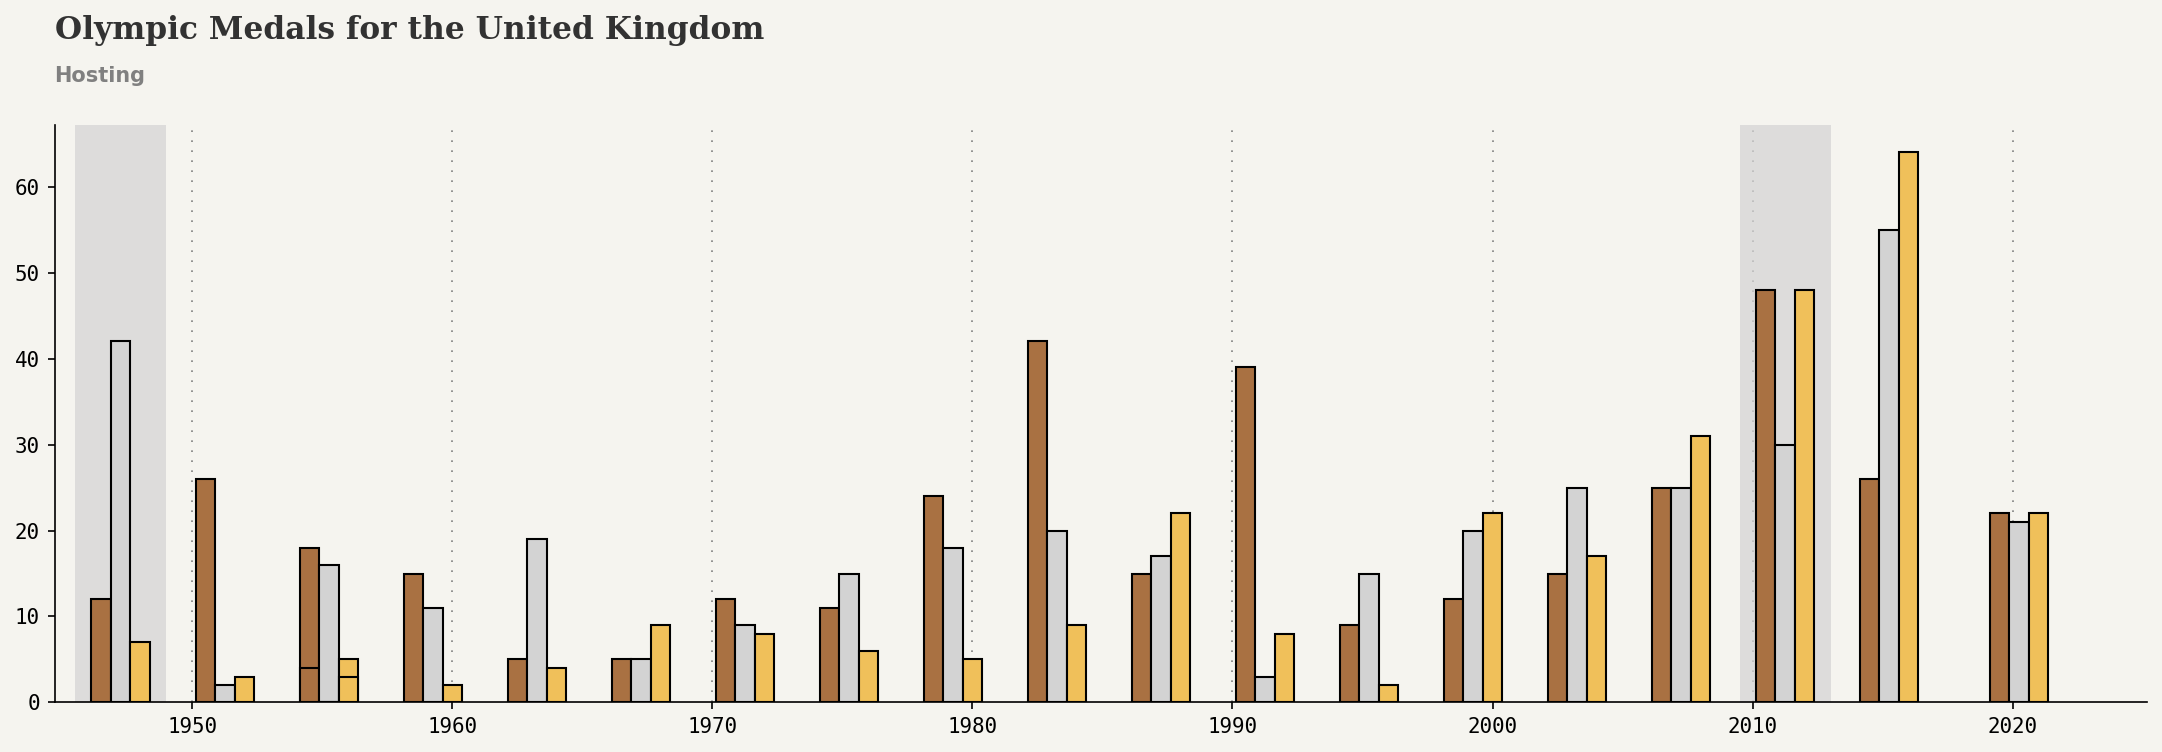

In [21]:
temp = df_new.query("region == 'United Kingdom' & Year > 1945")

fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor=background_color)

ax.set_facecolor(background_color)

color = ["#a97142", "lightgray", '#f0c05a']


# Host years
ax.axvspan(1949,1945.5, facecolor='lightgray',alpha=0.7)
ax.axvspan(2013,2009.5, facecolor='lightgray',alpha=0.7)

medals_list = ['Bronze', 'Silver', 'Gold']
width = 0.75
for i, medal in enumerate(np.array(medals_list)):
    ax.bar(temp['Year']+(width*(i-2)), temp[medal], width, color=color[i], label=medal, ec='black')
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart+3,Yend+10, 'Olympic Medals for the United Kingdom', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart+3,Yend+5, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='gray')


ax.set_xlim(Xstart+3, Xend)

ax.grid(which='both', axis='x', zorder=5, color='gray', linestyle=':', dashes=(1,5))

ax.set_axisbelow(True)

plt.show()

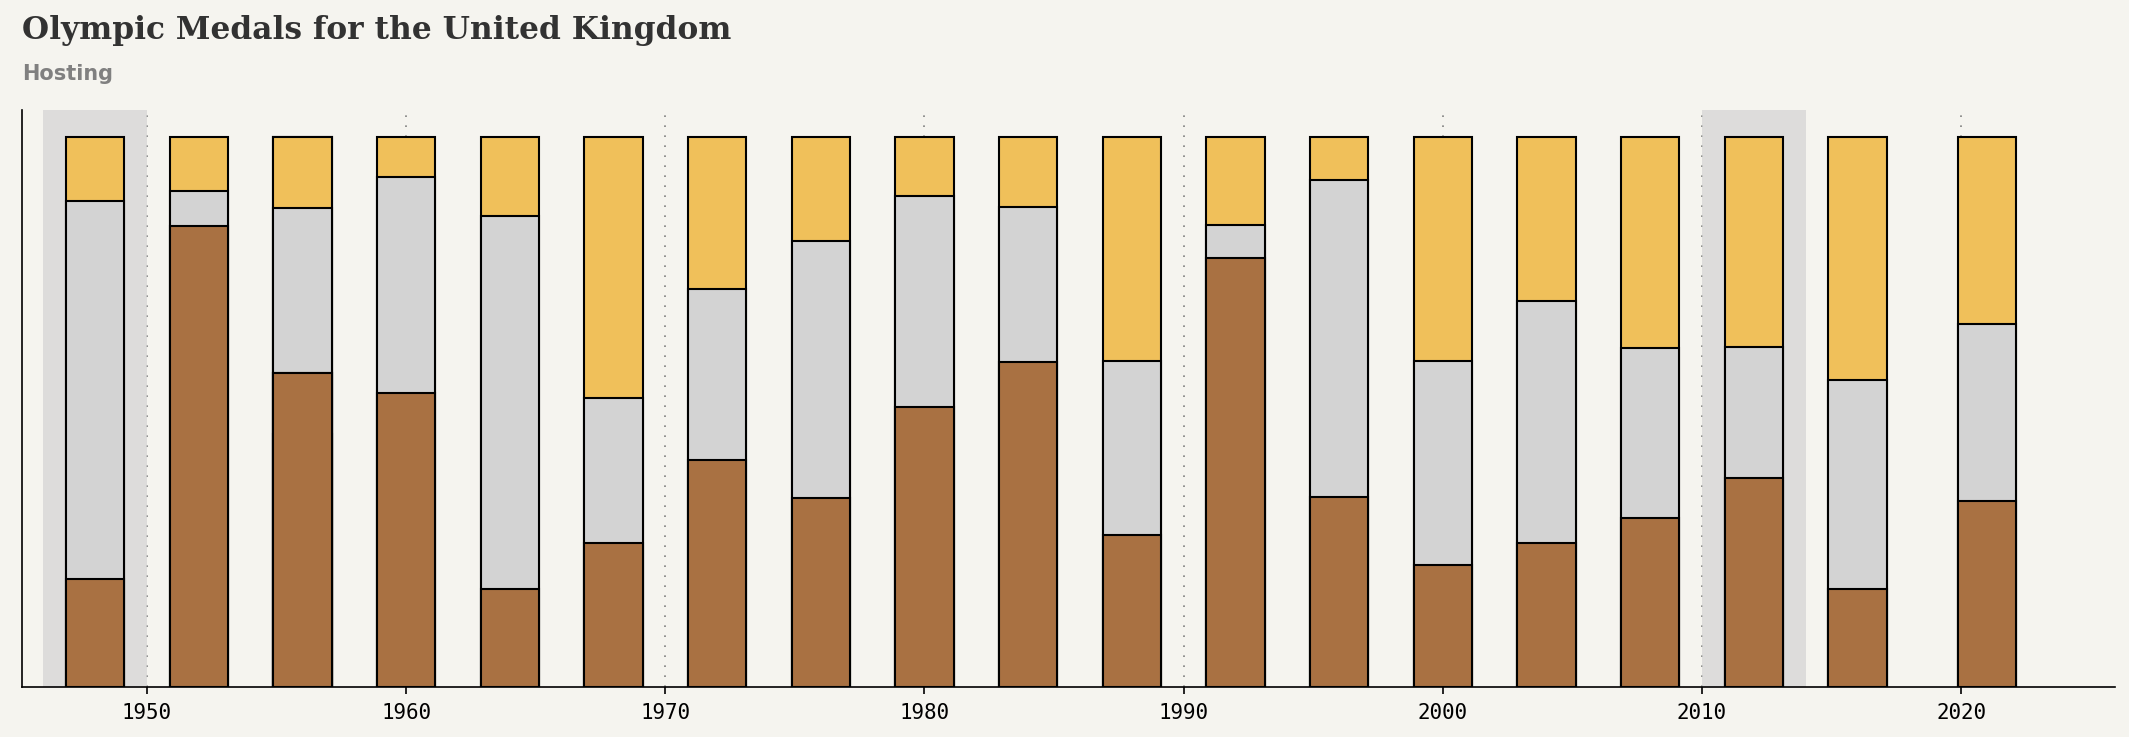

In [22]:
stack_temp = df_new.query("region == 'United Kingdom' & Year > 1945")[['Year','Bronze','Silver','Gold']].set_index('Year')
stack_temp = (stack_temp.T/stack_temp.sum(axis=1)).cumsum().T

fig, ax = plt.subplots(1,1, figsize=(18,5), facecolor=background_color)

# Host years
ax.axvspan(1950,1946, facecolor='lightgray',alpha=0.7)
ax.axvspan(2014,2010, facecolor='lightgray',alpha=0.7)


color = ["#a97142", "lightgray", '#f0c05a']
medals_list = ['Bronze', 'Silver', 'Gold']

for i, medal in enumerate(medals_list[::-1]):
    sentims = stack_temp[medal]
    ax.bar(sentims.index, sentims, color=color[::-1][i], label=medal, width=2.25, ec='black')

ax.set_facecolor(background_color)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_xlim(Xstart+3, Xend)
ax.grid(which='both', axis='x', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)
ax.get_yaxis().set_visible(False)

ax.text(Xstart+3,Yend+0.13, 'Olympic Medals for the United Kingdom', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart+3,Yend+0.055, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='gray')


plt.show()

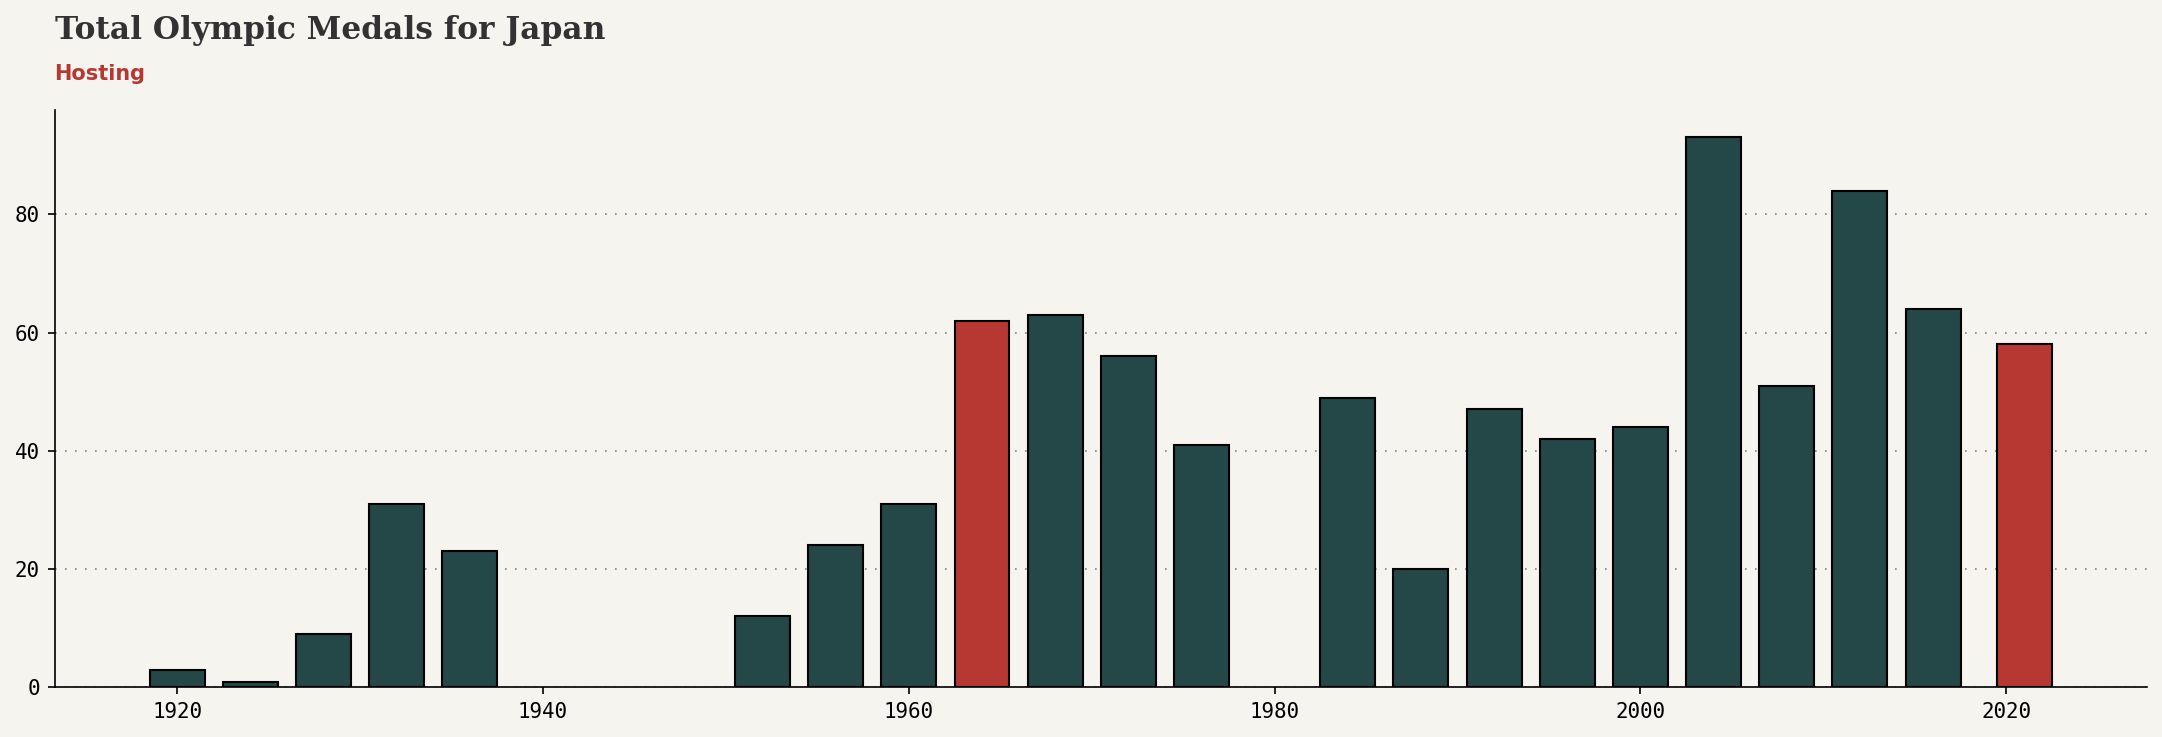

In [23]:
temp = df_new.query("region == 'Japan'")


fig, ax = plt.subplots(1, 1, figsize=(18, 5), dpi=150, facecolor=background_color)

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor(background_color)
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+12, 'Total Olympic Medals for Japan', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend+5, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')

plt.show()

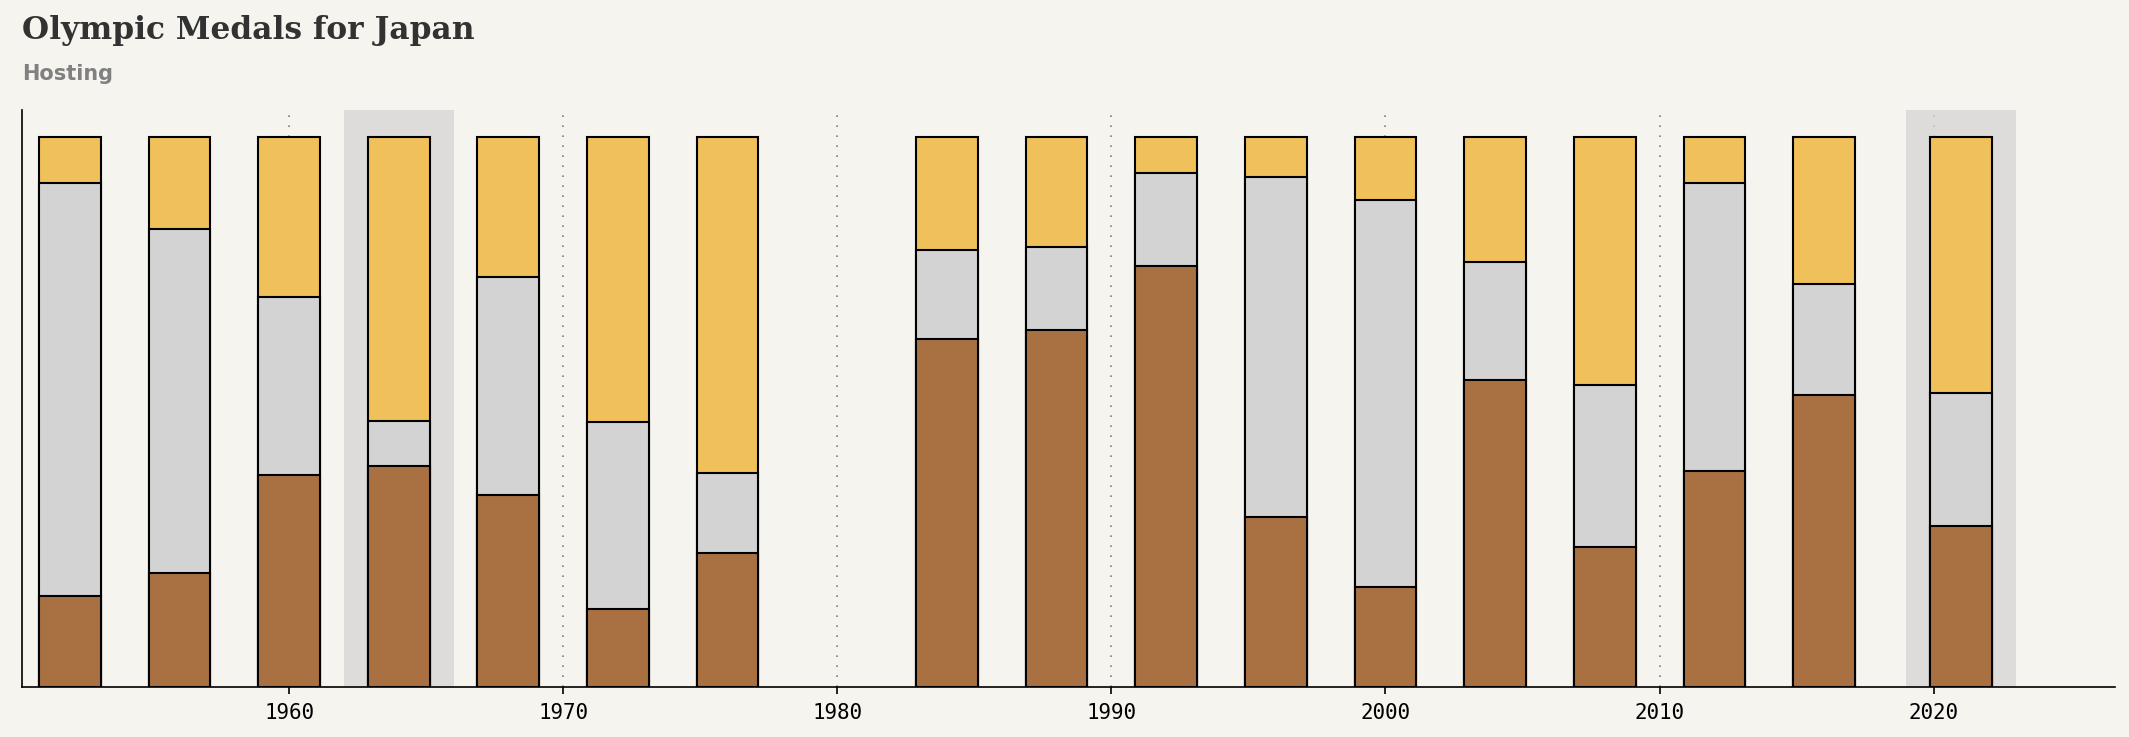

In [24]:
stack_temp = df_new.query("region == 'Japan' & Year > 1945")[['Year','Bronze','Silver','Gold']].set_index('Year')
stack_temp = (stack_temp.T/stack_temp.sum(axis=1)).cumsum().T

fig, ax = plt.subplots(1,1, figsize=(18,5), facecolor=background_color)

# Host years
ax.axvspan(2023,2019, facecolor='lightgray',alpha=0.7)
ax.axvspan(1966,1962, facecolor='lightgray',alpha=0.7)


color = ["#a97142", "lightgray", '#f0c05a']
medals_list = ['Bronze', 'Silver', 'Gold']

for i, medal in enumerate(medals_list[::-1]):
    sentims = stack_temp[medal]
    ax.bar(sentims.index, sentims, color=color[::-1][i], label=medal, width=2.25, ec='black')

ax.set_facecolor(background_color)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_xlim(Xstart+3, Xend)

ax.grid(which='both', axis='x', zorder=5, color='gray', linestyle=':', dashes=(1,5))

ax.set_axisbelow(True)
ax.get_yaxis().set_visible(False)

ax.text(Xstart+3,Yend+0.13, 'Olympic Medals for Japan', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart+3,Yend+0.055, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='gray')

plt.show()

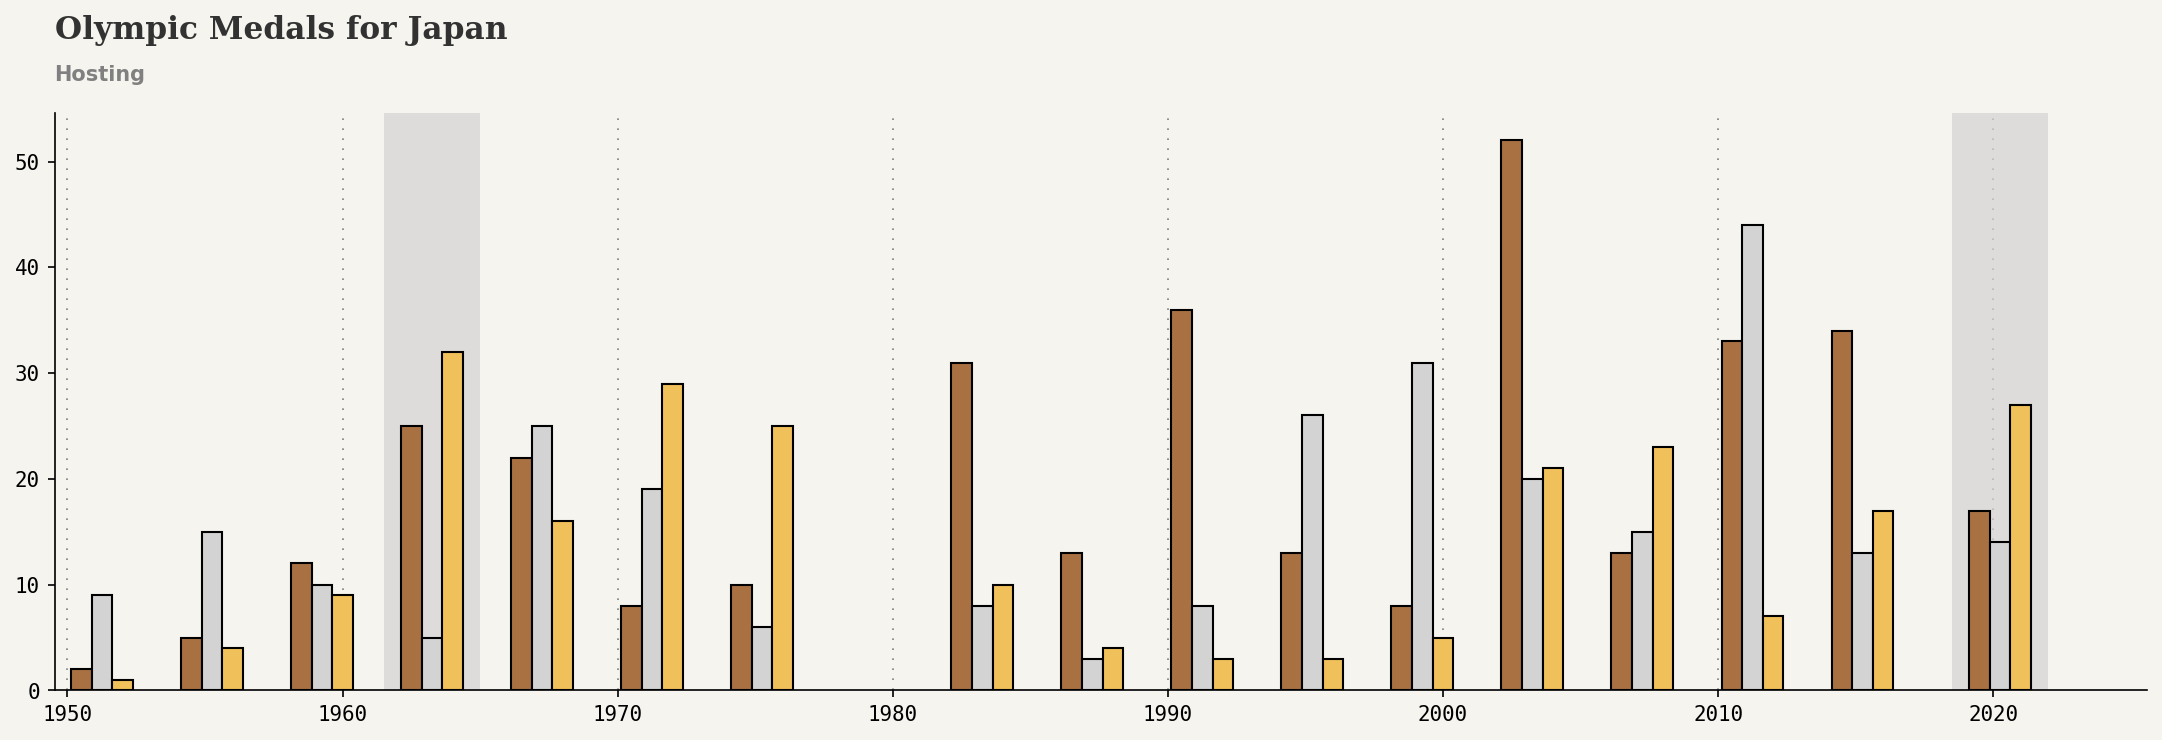

In [25]:
temp = df_new.query("region == 'Japan' & Year > 1945")

fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor=background_color)

ax.set_facecolor(background_color)

color = ["#a97142", "lightgray", '#f0c05a']


# Host years
ax.axvspan(2022,2018.5, facecolor='lightgray',alpha=0.7)
ax.axvspan(1965,1961.5, facecolor='lightgray',alpha=0.7)

medals_list = ['Bronze', 'Silver', 'Gold']
width = 0.75
for i, medal in enumerate(np.array(medals_list)):
    ax.bar(temp['Year']+(width*(i-2)), temp[medal], width, color=color[i], ec='black')
    

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart+3,Yend+7, 'Olympic Medals for Japan', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart+3,Yend+3, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='gray')

ax.set_xlim(Xstart+3, Xend)
ax.grid(which='both', axis='x', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

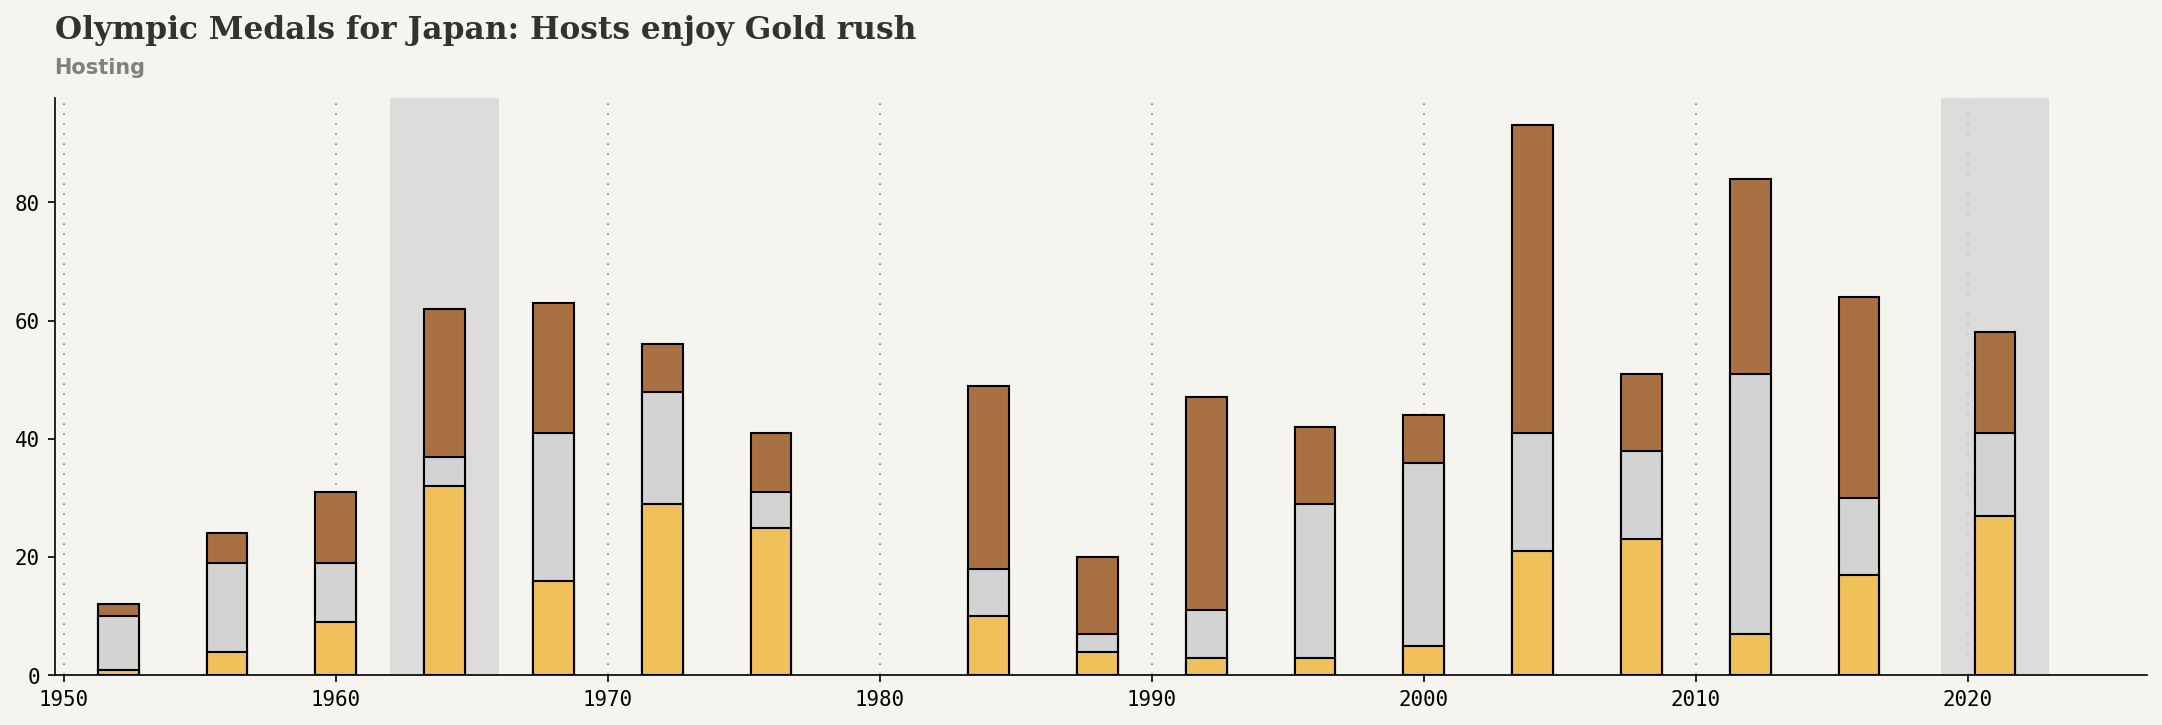

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor=background_color)

ax.set_facecolor(background_color)

color = ["#a97142", "lightgray", '#f0c05a']

# Host years
ax.axvspan(2023,2019, facecolor='lightgray',alpha=0.7)
ax.axvspan(1966,1962, facecolor='lightgray',alpha=0.7)


for i, medal in enumerate(medals_list):
    temp = df_new.query("region == 'Japan' & Year > 1945").groupby(['Year'])['Gold','Silver','Bronze'].sum().cumsum(axis=1)[medal]
    ax.bar(temp.index, temp, color=color[i],width=1.5,ec='black')
    

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart+2,Yend+10, 'Olympic Medals for Japan: Hosts enjoy Gold rush', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart+2,Yend+4, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='gray')

ax.set_xlim(Xstart+2, Xend)
ax.grid(which='both', axis='x', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
plt.show()

In [27]:
host_list = list(df_new.query("Is_Host == 1")['Host_Country'].value_counts().index)

Not_hosting = df_new[df_new['region'].isin(host_list)].query("Is_Host == 0")[['Bronze','Silver','Gold']].mean().reset_index()
hosting = df_new[df_new['region'].isin(host_list)].query("Is_Host == 1")[['Bronze','Silver','Gold']].mean().reset_index()

radar = pd.merge(hosting, Not_hosting, on='index')
radar.columns = ['Medal','Hosting', 'Not Hosting']
radar = radar.set_index('Medal').T.reset_index()
radar = radar[['index','Gold','Silver','Bronze']]

Text(0, 0.89, 'Not Hosting')

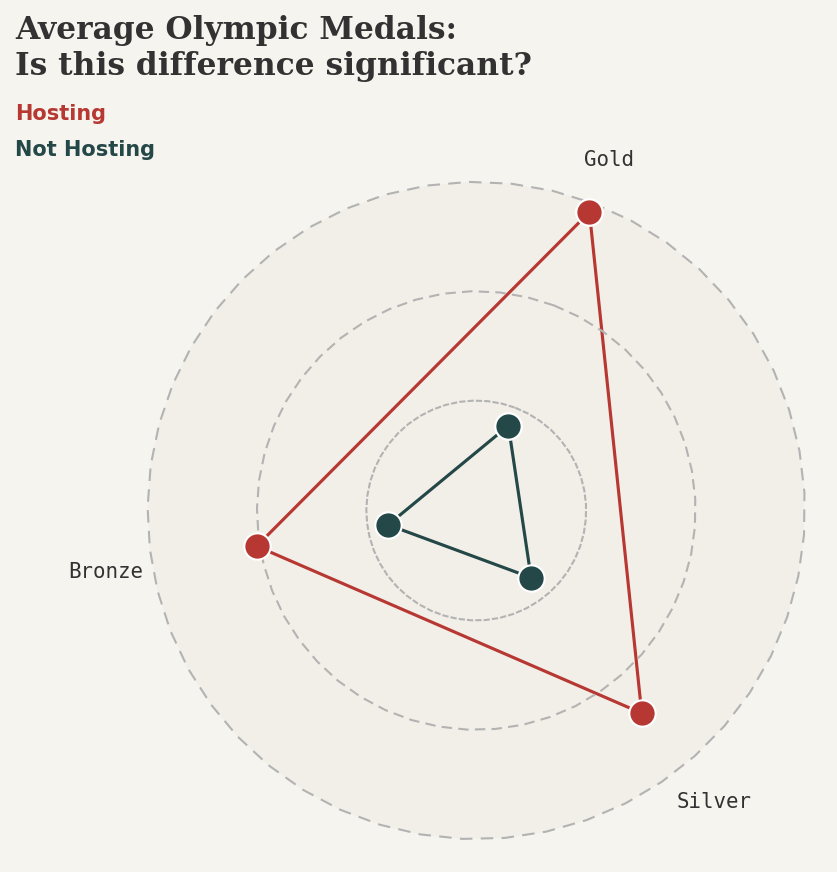

In [28]:
# Inpsired by Tuo Wang, https://tuowang.rbind.io/
# https://www.python-graph-gallery.com/
# Host or Not Host
Comparison = radar["index"].values.tolist()

medals = ['Gold', 'Silver','Bronze']
length = len(medals)

colors = ["#B73832", "#244747"]

# The angles at which the values of the numeric variables are placed
ANGLES = [n / length * 2 * np.pi for n in range(length)]
ANGLES += ANGLES[:1]
 
# Angle values going from 0 to 2*pi
HANGLES = np.linspace(0, 2 * np.pi)

# Surrounding circles
H0 = np.ones(len(HANGLES)) * 20
H1 = np.ones(len(HANGLES)) * 40
H2 = np.ones(len(HANGLES)) * 60

# Plot
fig = plt.figure(figsize=(6, 6), facecolor=background_color)
ax = fig.add_subplot(1,1,1, polar=True)
ax.set_facecolor(background_color)
 
# rotate plot
ax.set_theta_offset(np.pi / 2.6)
ax.set_theta_direction(-1)

# Radius of plot
ax.set_ylim(-0.1, radar[['Gold','Silver','Bronze']].max().max()+5)

# Radar
for idx, host in enumerate(Comparison):
    values = radar.iloc[idx].drop("index").values.tolist()
    values += values[:1]
    ax.plot(ANGLES, values, c=colors[idx], linewidth=1.5, label=host)
    ax.scatter(ANGLES, values, s=160, c=colors[idx],ec='white',zorder=10)

# edit lines & fill between
ax.plot(HANGLES, H0, ls=(0, (3, 1)),lw=1, c='#b3b3b3')
ax.plot(HANGLES, H1, ls=(0, (5, 3)),lw=1, c='#b3b3b3')
ax.plot(HANGLES, H2, ls=(0, (6, 4)),lw=1, c='#b3b3b3')
ax.fill(HANGLES, H2, '#f2efe8')

# Tidy up & labels
ax.set_xticks(ANGLES[:-1])
ax.set_xticklabels(medals, size=10, color='#323232')
ax.set_yticks([])
ax.yaxis.grid(False)
ax.xaxis.grid(False)
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Title
fig.text(0,0.98, 'Average Olympic Medals:\nIs this difference significant?', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
fig.text(0,0.93, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')
fig.text(0,0.89, 'Not Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#244747')


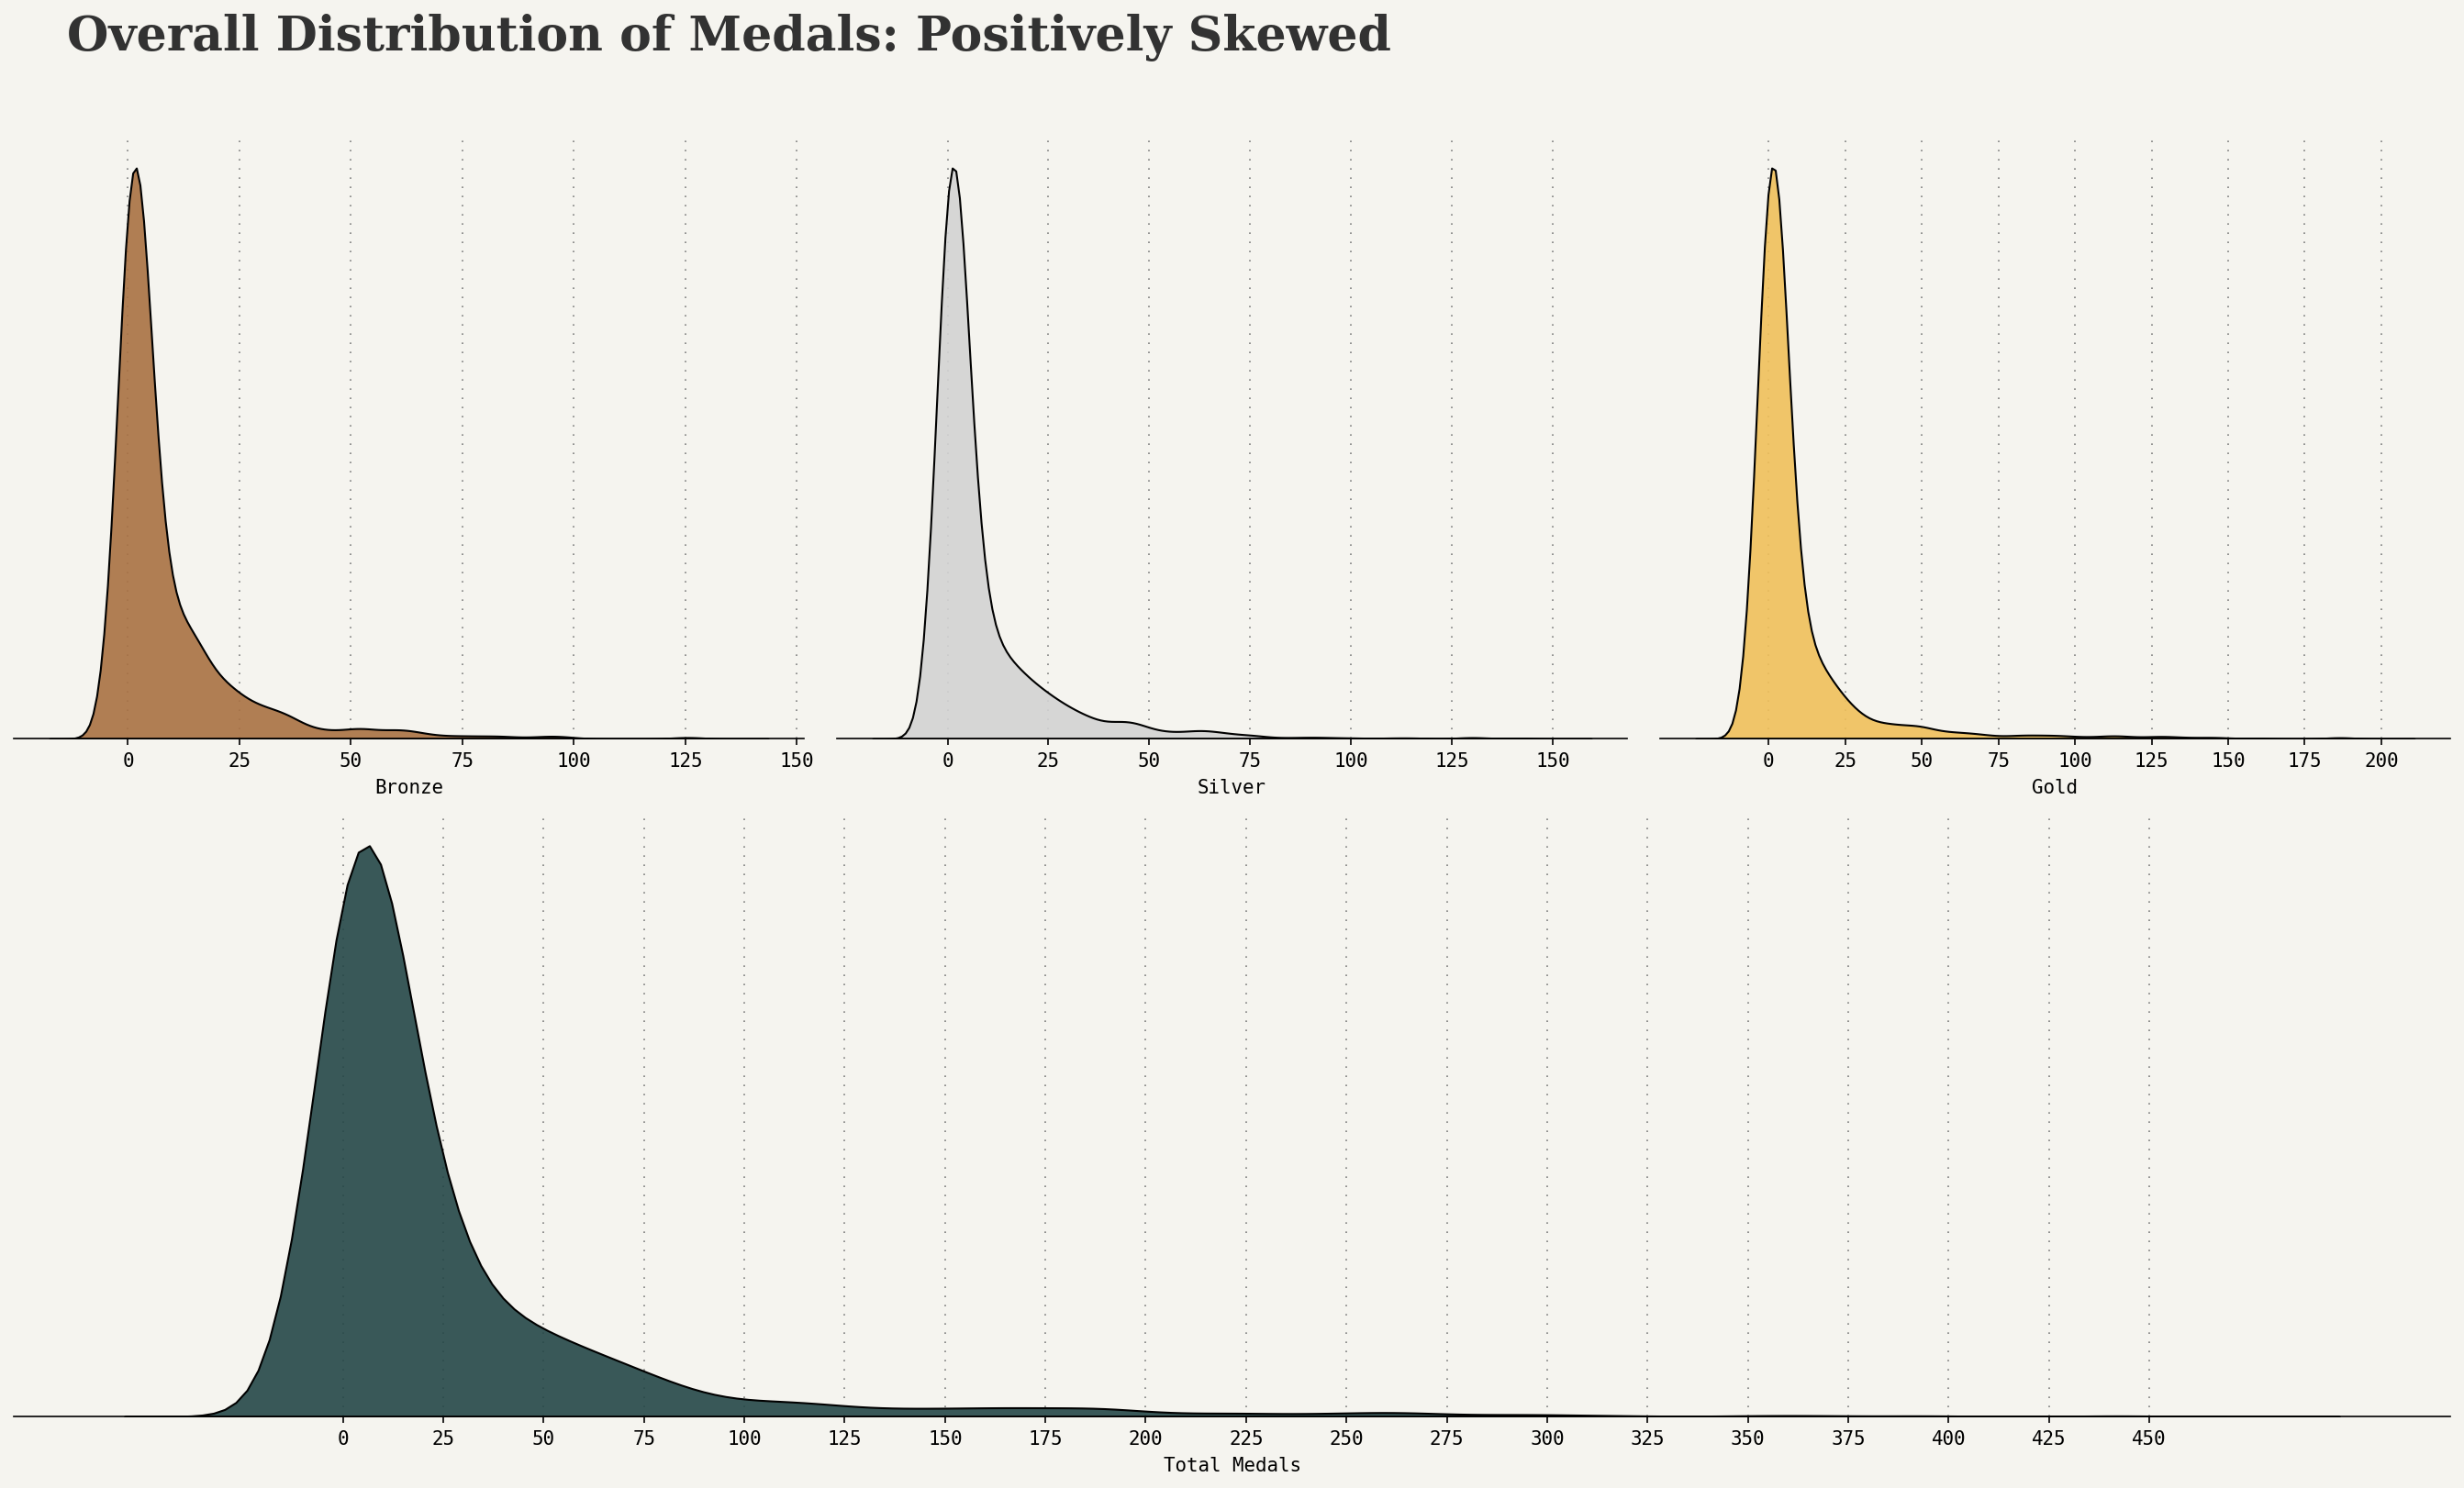

In [29]:
# Wrote this for 4 variables

fig = plt.figure(figsize=(18,10), facecolor=background_color)

colors = ['#a97142', 'lightgray', '#f0c05a', '#244747']

num = 0
variables = ['Bronze', 'Silver', 'Gold', 'Total Medals']

plots = [(0,0), (0,1), (0,2), (1,0)]

data = df_new

for item in variables:
    
    if plots[num] == plots[-1]:
        colspan=3
    else: 
        colspan=1
        
    plt.subplot2grid((2,3), (plots[num]), colspan=colspan)
    
    ax = sns.kdeplot(data=data, x=item,color=colors[num],shade=True,  alpha=0.9, ec='black', cut=5)
    ax.set_facecolor(background_color)
    ax.tick_params(axis='y', left=False)
    ax.get_yaxis().set_visible(False)
    ax.set_axisbelow(True)
    ax.set_xlabel(item)
    ax.grid(which='major', axis='x', zorder=5, color='gray', linestyle=':', dashes=(1,5))
    for s in ["top","right","left"]:
        ax.spines[s].set_visible(False)
    
    plt.xticks(list(np.arange(0,data[item].max()+25,25)))
        
    num +=1 
    
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

fig.text(0.03,1.05, 'Overall Distribution of Medals: Positively Skewed', fontsize=25,fontweight='bold',fontfamily='serif',color='#323232')

    
plt.tight_layout()
plt.show()

In [30]:
host_list = list(df_new.query("Is_Host == 1")['Host_Country'].value_counts().index)

df_new['Total_Medals_NaturalLog'] = np.log(df_new['Total Medals'])

Not_hosting_samples = df_new[df_new['region'].isin(host_list)].query("Is_Host == 0")['Total_Medals_NaturalLog'].count()
hosting_samples = df_new[df_new['region'].isin(host_list)].query("Is_Host == 1")['Total_Medals_NaturalLog'].count()

Not_hosting_mean = df_new[df_new['region'].isin(host_list)].query("Is_Host == 0")['Total_Medals_NaturalLog'].mean()
hosting_mean = df_new[df_new['region'].isin(host_list)].query("Is_Host == 1")['Total_Medals_NaturalLog'].mean()

Not_hosting_std = df_new[df_new['region'].isin(host_list)].query("Is_Host == 0")['Total_Medals_NaturalLog'].std()
hosting_std = df_new[df_new['region'].isin(host_list)].query("Is_Host == 1")['Total_Medals_NaturalLog'].std()

In [31]:
print(color_font.S+"Key Statistics"+color_font.E)
print("Mean Natural Log of Total Medals when Not Hosting:\n",Not_hosting_mean)
print("Mean Natural Log of Total Medals when Hosting:\n",hosting_mean,"\n")


Not_hosting_std_error = Not_hosting_std/np.sqrt(Not_hosting_samples)
print("Standard Error of Natural Log of Total Medals when Not Hosting:\n",Not_hosting_std_error)

hosting_std_error = hosting_std/np.sqrt(hosting_samples)
print("Standard Error of Natural Log of Total Medals when Not Hosting:\n",hosting_std_error)

Key Statistics
Mean Natural Log of Total Medals when Not Hosting:
 3.086281690114543
Mean Natural Log of Total Medals when Hosting:
 4.566512430214569 

Standard Error of Natural Log of Total Medals when Not Hosting:
 0.06927049040753175
Standard Error of Natural Log of Total Medals when Not Hosting:
 0.19153671012884035


In [32]:
top = (hosting_mean-Not_hosting_mean)

bott1 = Not_hosting_std**2/Not_hosting_samples

bott2 = hosting_std**2/hosting_samples

print(color_font.S+"Standard Errors between means"+color_font.E)
print(top/(np.sqrt(bott1 + bott2)))

Standard Errors between means
7.26750565554929


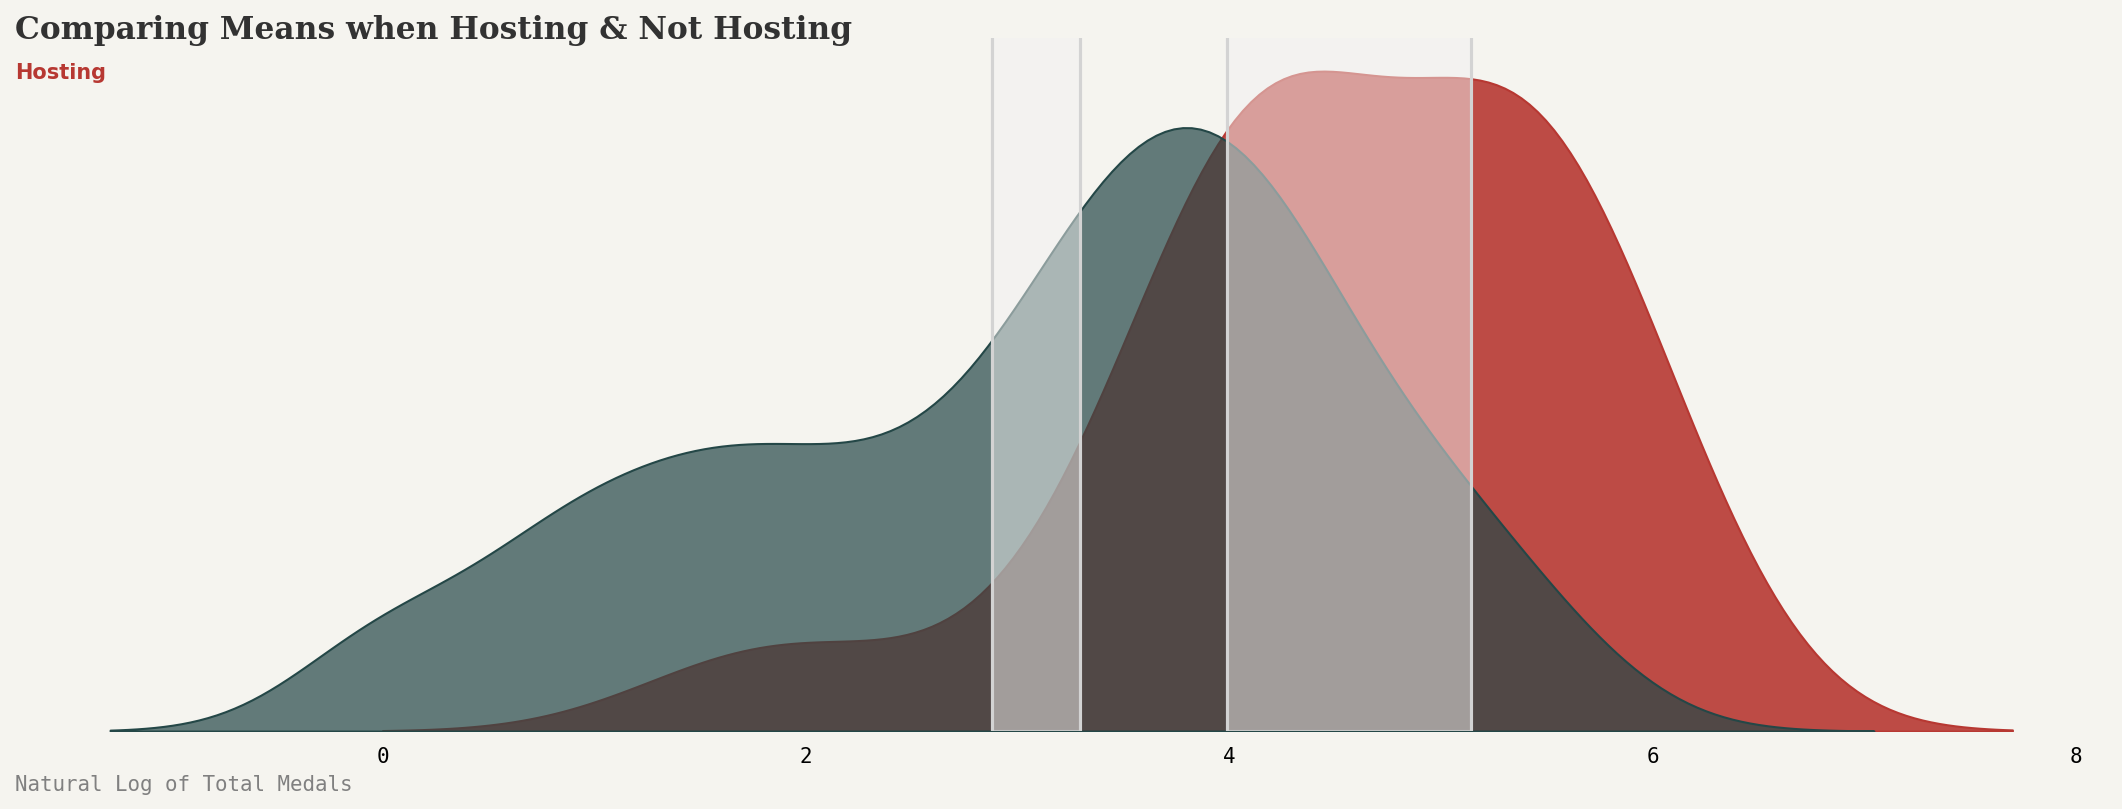

In [33]:
fig, ax = plt.subplots(1,1, figsize=(18,6), facecolor=background_color)
ax.set_facecolor(background_color)
sns.kdeplot(data=df_new[df_new['region'].isin(host_list)].query("Is_Host == 1"), x='Total_Medals_NaturalLog',shade=True,color='#B73832',alpha=0.9, ax=ax)
sns.kdeplot(data=df_new[df_new['region'].isin(host_list)].query("Is_Host == 0"), x='Total_Medals_NaturalLog', shade=True, color='#244747',alpha=0.7, ax=ax)

ax.axvline(color='lightgray',x=Not_hosting_mean+(3*Not_hosting_std_error))
ax.axvline(color='lightgray',x=Not_hosting_mean-(3*Not_hosting_std_error))
ax.axvspan(Not_hosting_mean-(3*Not_hosting_std_error), Not_hosting_mean+(3*Not_hosting_std_error), alpha=0.5, color='#f3f2f1')

#ax.axvline(x=Not_hosting_mean)

#ax.axvline(x=hosting_mean)
ax.axvline(color='lightgray',x=hosting_mean+(3*hosting_std_error))
ax.axvline(color='lightgray',x=hosting_mean-(3*hosting_std_error))
ax.axvspan(hosting_mean-(3*hosting_std_error), hosting_mean+(3*hosting_std_error), alpha=0.5, color='#f3f2f1')

for s in ['top','left', 'bottom', 'right']:
    ax.spines[s].set_visible(False)
    
ax.set_xlabel("Natural Log of Total Medals",fontfamily='monospace',loc='left',color='gray')
ax.get_yaxis().set_visible(False)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 


Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend, 'Comparing Means when Hosting & Not Hosting', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend-0.02, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')



plt.show()

In [34]:
from scipy.stats import ttest_ind

print(color_font.S+"T-Test"+color_font.E)
# compare samples
stat, p = ttest_ind(df_new[df_new['region'].isin(host_list)].query("Is_Host == 0")['Total_Medals_NaturalLog'], df_new[df_new['region'].isin(host_list)].query("Is_Host == 1")['Total_Medals_NaturalLog'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

T-Test
Statistics=-5.583, p=0.000
Different distributions (reject H0)
